<a href="https://colab.research.google.com/github/Sapienza-AI-Lab-a-a-2021-22/esercitazione5/blob/main/Solutions_of_Linear_Regression.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

This Exercise is designed for the understanding of the usage of the basic packages and the concepts of Machine learning basics such as feature selection, Exploratory Data Analysis, Test-train split, some funtions for implementing simple linear regression and multiple linear regression.

## Import Libraries
Import the necessary libraries for DATA ANALYSIS(Pandas, Numpy), PLOTTING(Matplotlib,seaborn) and Machine Learning(Scikit-learn) 

### Task

In [1]:
# imports for the task

%matplotlib inline
 
# your imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset
from git, download the `auto-mpg.csv` and upload into the runtime using the `upload` icon in the side bar of your colab.

Load the data into the dataframe and analyse the given data.
### Task

In [3]:
# df = # your code goes here

df = pd.read_csv("/content/auto-mpg.csv",header=0, sep=',')

###DATA ANALYSIS



Verify the dataframe structure and the content datatypes with the following code

In [4]:
# print some values
df.head()

,MPG,CYL,DIS,HP,WGT,ACC,YR,ORG,NAME
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
df.dtypes

MPG     float64
CYL       int64
DIS     float64
HP      float64
WGT     float64
ACC     float64
YR        int64
ORG       int64
NAME     object
dtype: object

In [6]:
df.describe()

,MPG,CYL,DIS,HP,WGT,ACC,YR,ORG
count,318.000000,318.000000,318.000000,316.000000,318.000000,318.000000,318.000000,318.000000
mean,21.383333,5.738994,210.190252,110.297468,3096.578616,15.317296,74.720126,1.474843
std,6.692489,1.746864,108.164260,39.929066,878.263884,2.751332,2.943255,0.739381
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,16.000000,4.000000,108.000000,80.750000,2265.000000,13.500000,72.000000,1.000000
50%,20.100000,6.000000,200.000000,97.500000,2996.500000,15.200000,75.000000,1.000000
75%,26.000000,8.000000,304.000000,140.000000,3811.250000,17.000000,77.000000,2.000000
max,43.100000,8.000000,455.000000,230.000000,5140.000000,24.800000,80.000000,3.000000


It is important to understand that the given data might not be complete always. There might be **NAN/Nill** values present. It is always better to check for these values and either remove those values or fill it with appropriate data (Zeros).

In [7]:
#perform the check for NaN values in the dataframe


# your code goes here
df.isna().sum()

MPG     0
CYL     0
DIS     0
HP      2
WGT     0
ACC     0
YR      0
ORG     0
NAME    0
dtype: int64

After checking the dataframe for Nan Values, if you find any NaN Values in the dataframe, fill it with zeros or drop the values using pandas (fillna()/dropna()) functions available.

In [8]:
# your code goes here
df = df.dropna()

In [9]:
df.isna().sum()

MPG     0
CYL     0
DIS     0
HP      0
WGT     0
ACC     0
YR      0
ORG     0
NAME    0
dtype: int64

## Exploratory data Analysis

The following is the example for pairplotting using pandas built-in plotting function. Perform the same pair plotting using **seaborn** package. Experiment with displot, jointplot functions in seaborn package

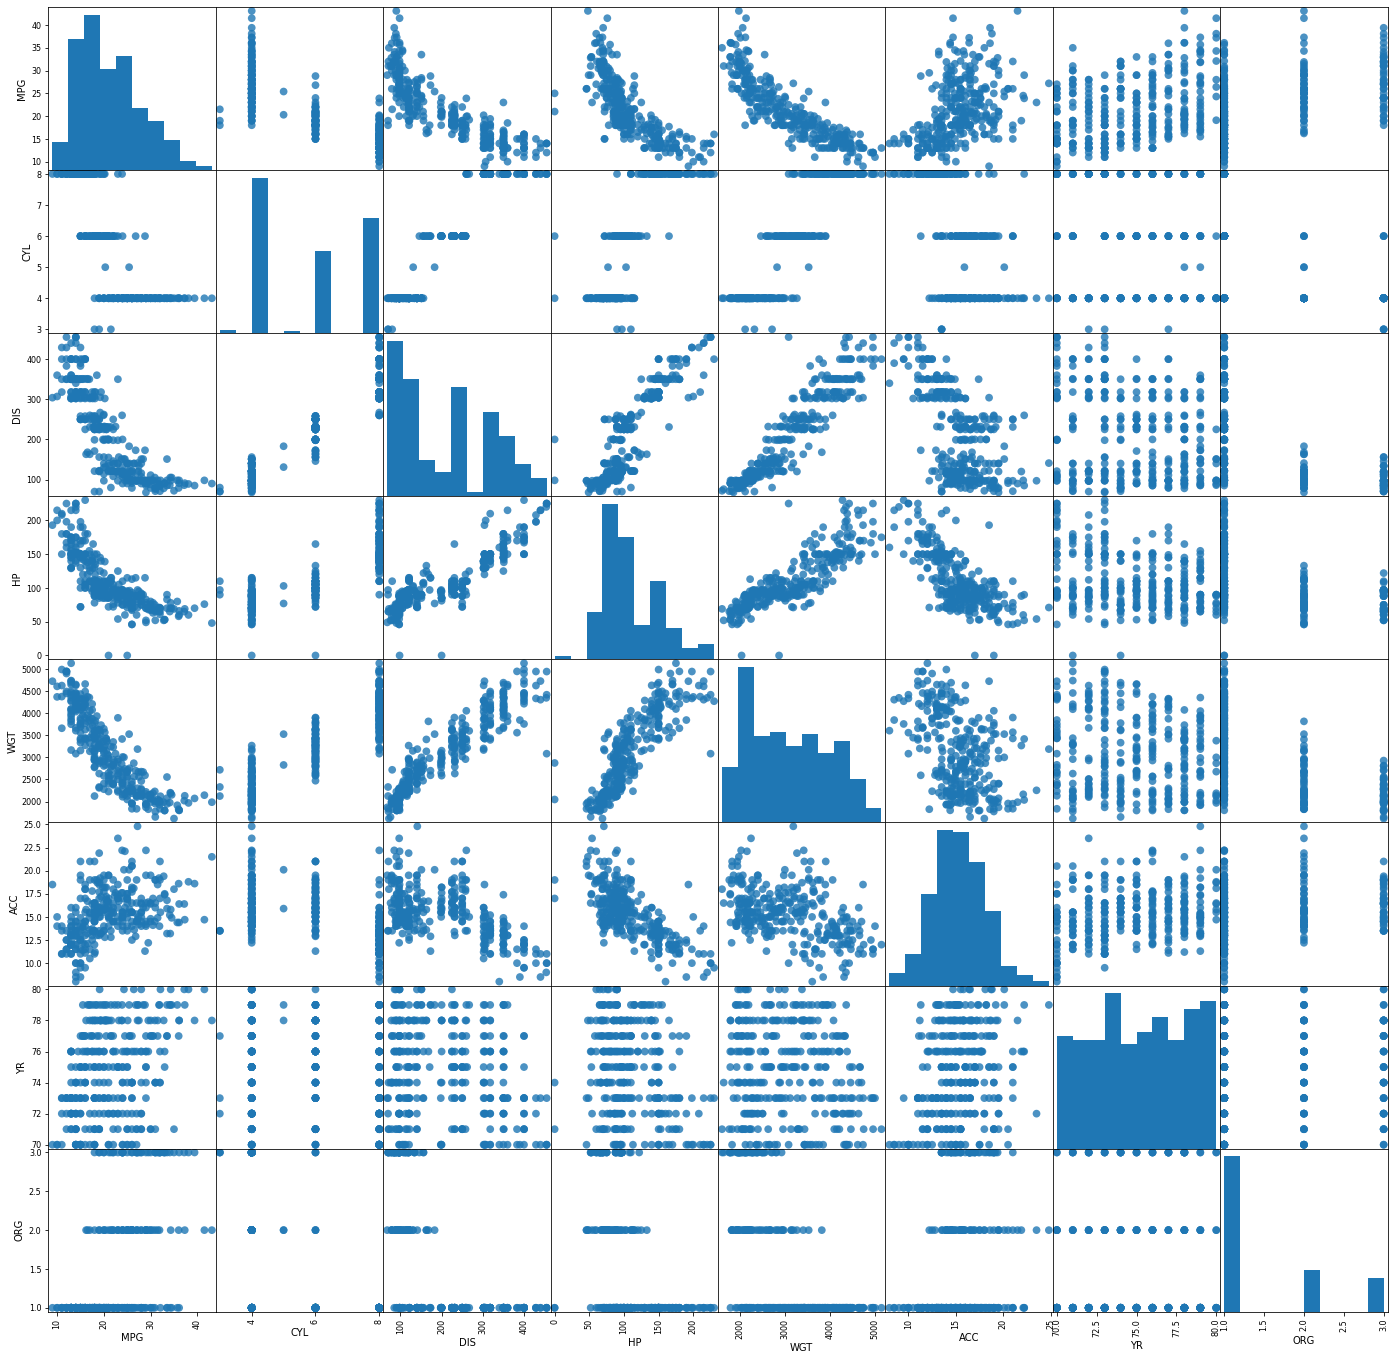

In [ ]:
g = pd.plotting.scatter_matrix(df, figsize=(24,24), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)

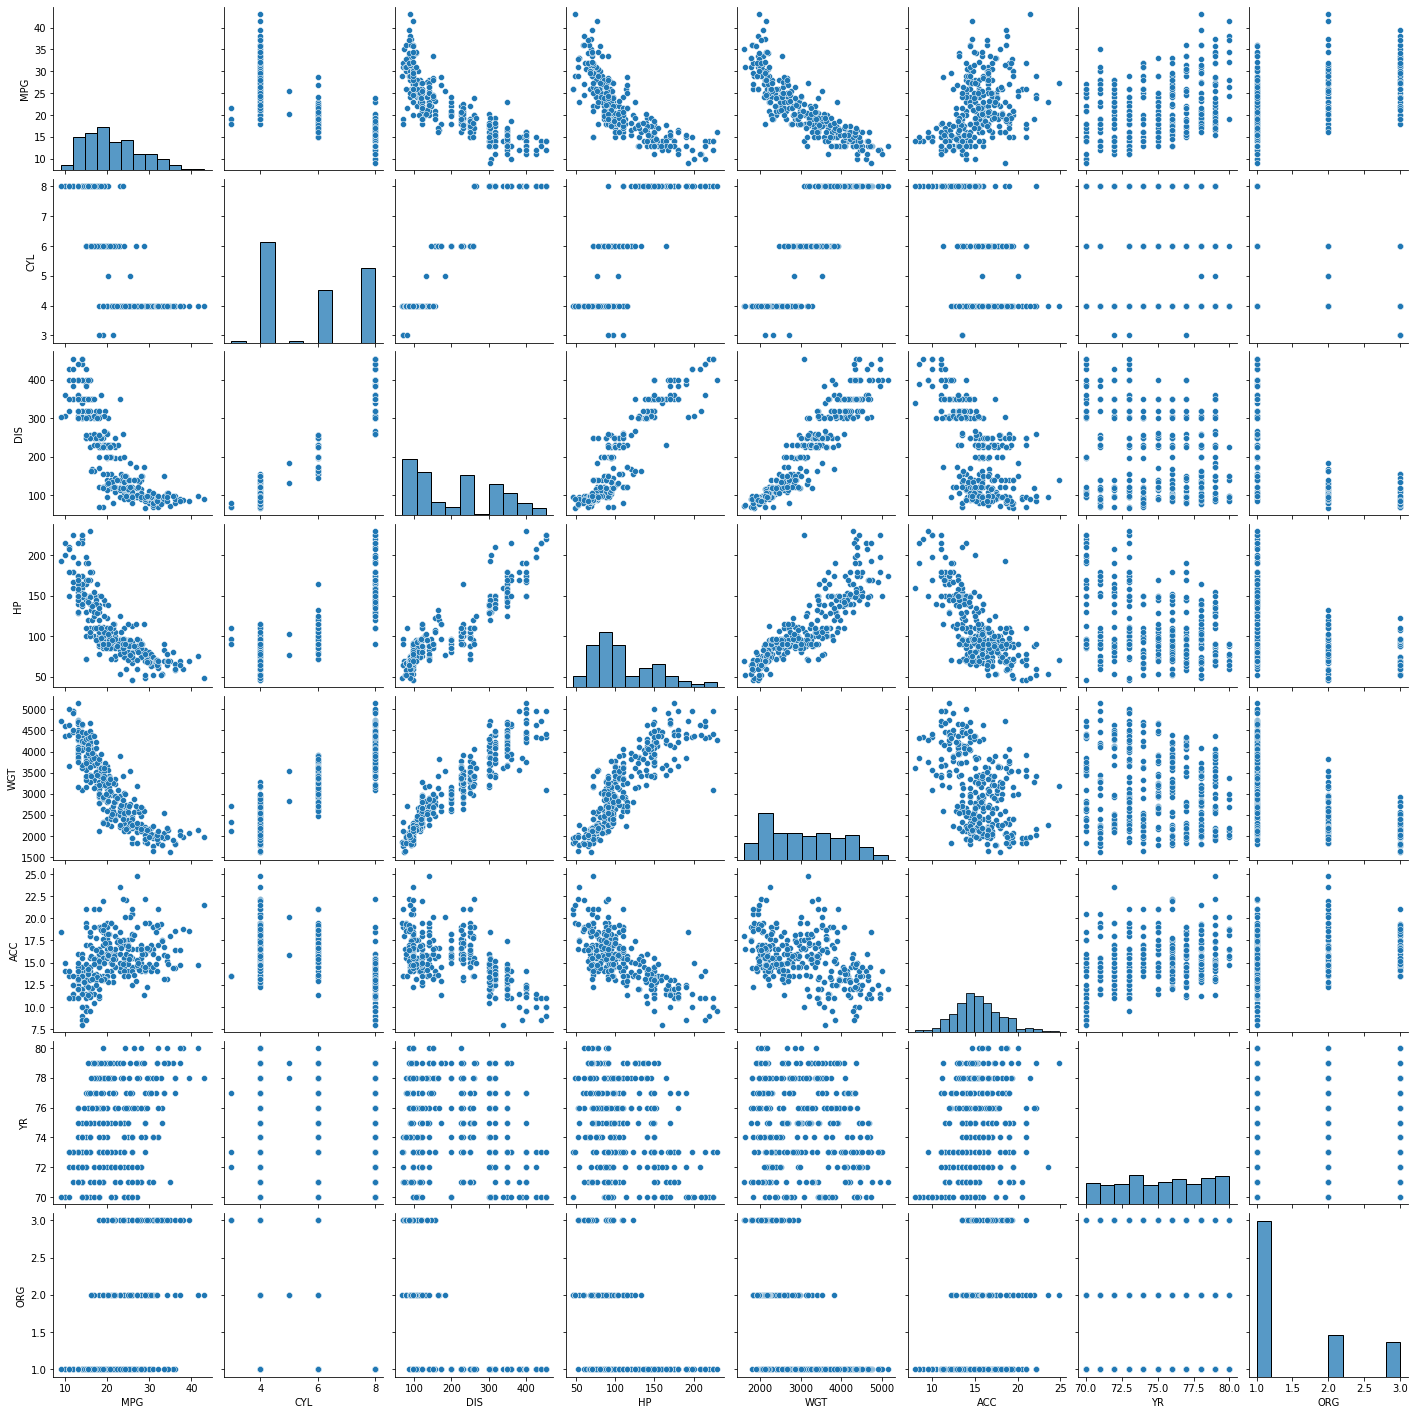

In [10]:
# your code for plotting using seaborn goes here
sns.pairplot(df,kind='scatter')

In [11]:
cols = list(df.columns)
print(df[cols[:-1]])

      MPG  CYL    DIS     HP     WGT   ACC  YR  ORG
0    18.0    8  307.0  130.0  3504.0  12.0  70    1
1    15.0    8  350.0  165.0  3693.0  11.5  70    1
2    18.0    8  318.0  150.0  3436.0  11.0  70    1
3    16.0    8  304.0  150.0  3433.0  12.0  70    1
4    17.0    8  302.0  140.0  3449.0  10.5  70    1
..    ...  ...    ...    ...     ...   ...  ..  ...
313  28.0    4  151.0   90.0  2678.0  16.5  80    1
314  26.4    4  140.0   88.0  2870.0  18.1  80    1
315  24.3    4  151.0   90.0  3003.0  20.1  80    1
316  19.1    6  225.0   90.0  3381.0  18.7  80    1
317  34.3    4   97.0   78.0  2188.0  15.8  80    2

[316 rows x 8 columns]


<Figure size 432x288 with 0 Axes>

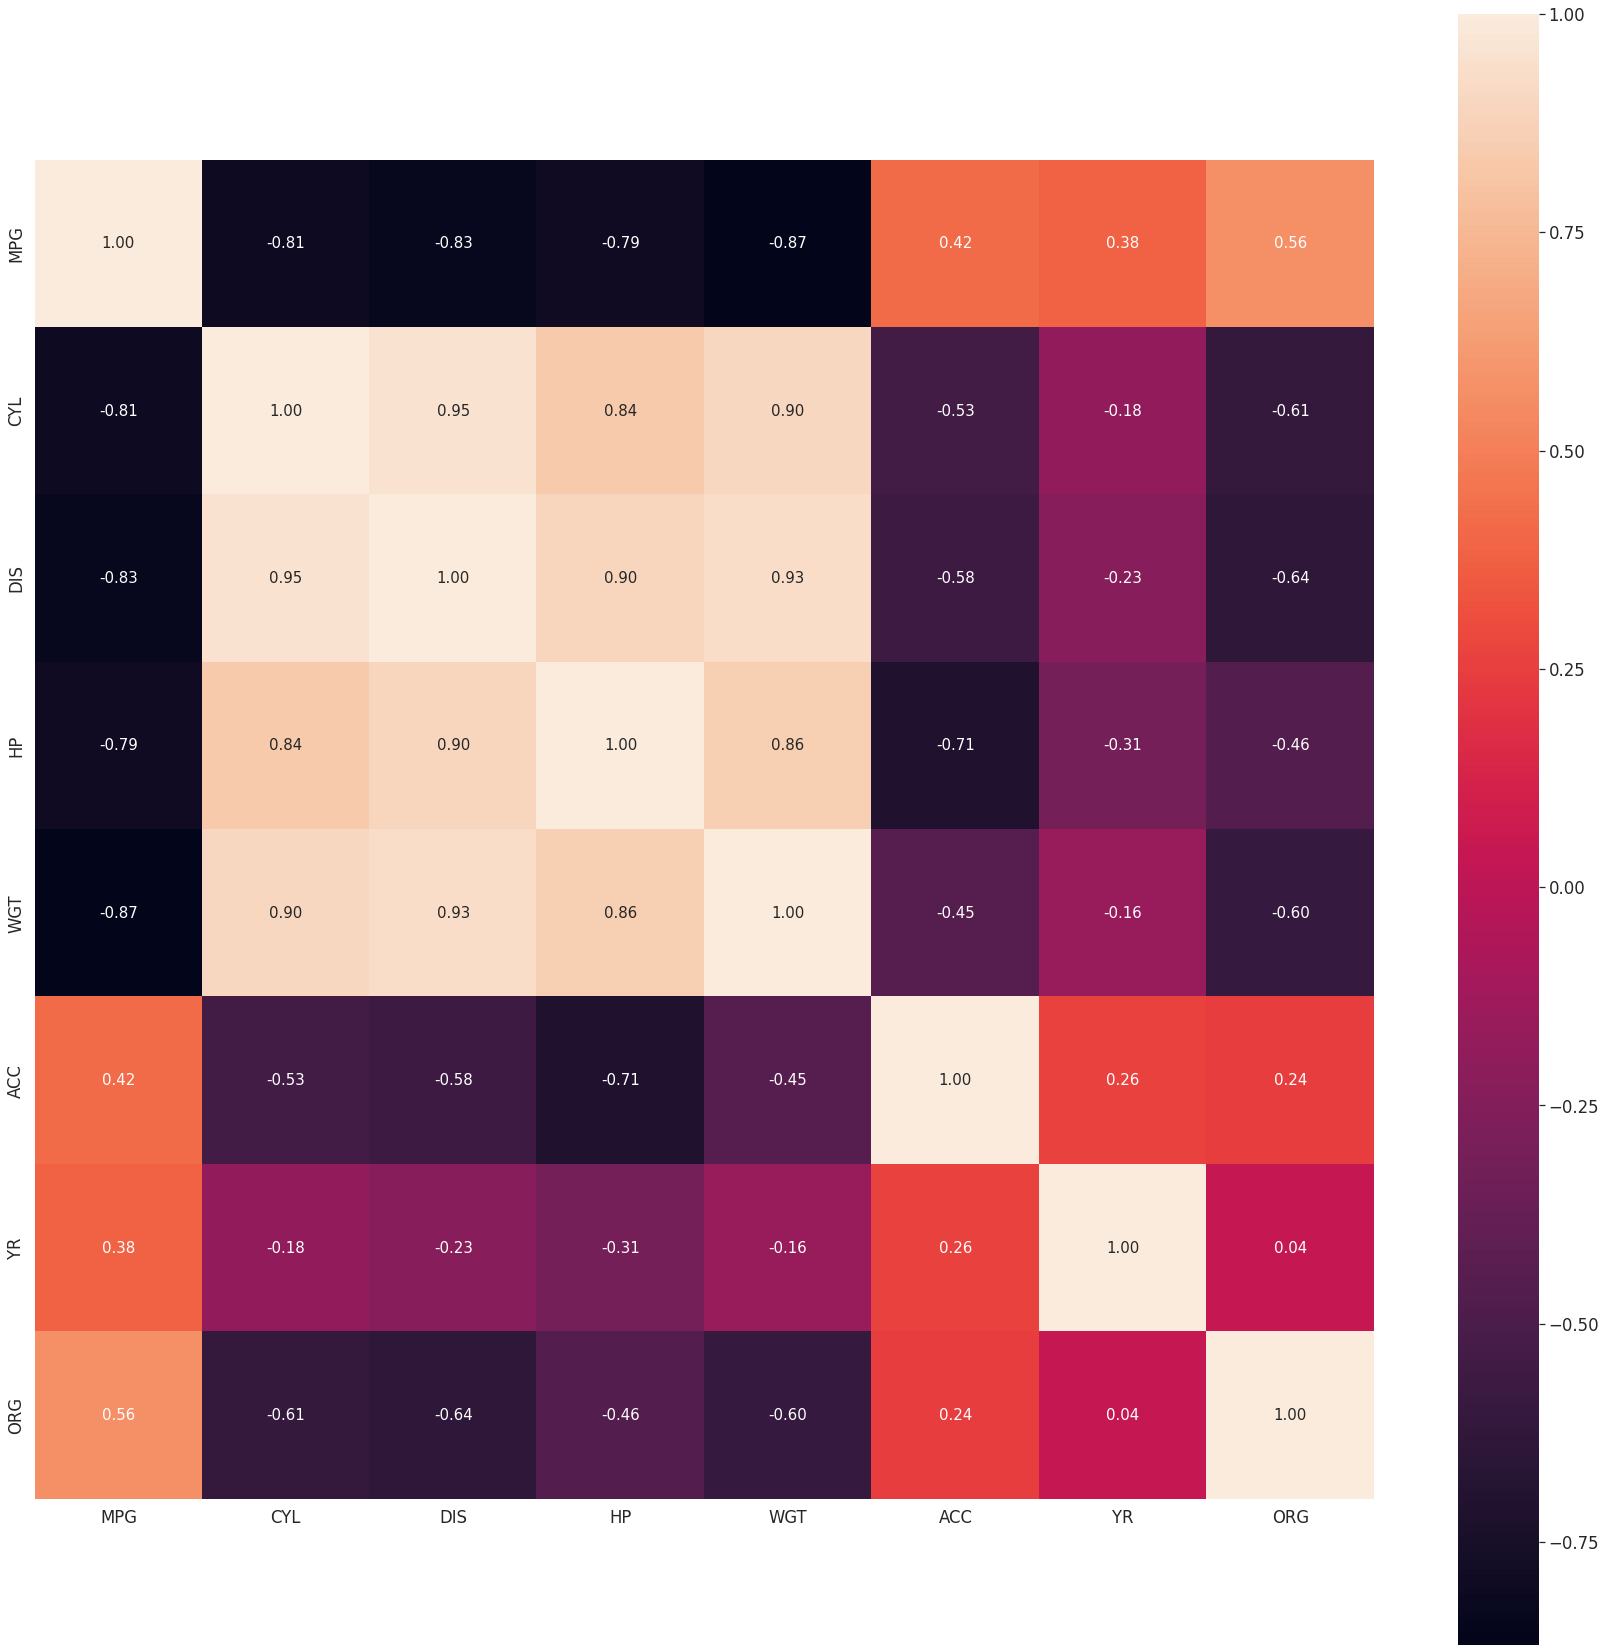

In [12]:
# Compute the correlation coefficient
import numpy as np
plt.figure()
cm = np.corrcoef(df[cols[:-1]].values.T)
sns.set(font_scale=1.5)
plt.figure(figsize = (30,30))
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols[:-1], xticklabels=cols[:-1])
plt.show()

sns.reset_orig()

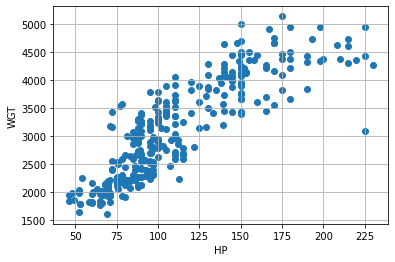

In [13]:
# plot some HP to WGT pairs
plt.figure()
plt.scatter(df['HP'], df['WGT'])
plt.xlabel('HP')
plt.ylabel('WGT')
plt.grid(True)
plt.show()

## Feature selection

Implement the feature selection strategy after going throgh the pair plots. Find the dependancy between variables and choose accordingly

In [14]:
import numpy as np

def load_mpg_data(features, targets):

    X = np.array(features)
    y = np.array(targets)
    
    print(X.shape,y.shape)
    
    return X, y

if __name__ == '__main__':

    feature_X = df['HP'] # fill the columns you want to extract features
    feature_y = df['NAME'] # fill the columns you want to target features

    X, Y = load_mpg_data(feature_X, feature_y)

(316,) (316,)


The following code is a sample for some features selected. The targets (in this case dtype:str) selcted are car names. The car names are converted into the unique numbers using the categorical encoding. 

Implement your own logic code fitting your feature selection fromn the above code block.

In [15]:
# Load mpg dataset
features = df[['HP','MPG']]
targets = df['NAME'].astype('category')
targets = targets.cat.codes
X, y = load_mpg_data(features, targets)


(316, 2) (316,)


### Normalisation

The features chosen are to be normalised. Use Min-max Normalisation using Numpy/scikit-learn

In [16]:
# normalize features

#your code goes here.

Xn = (X - np.mean(X, axis=0))/ np.std(X, axis=0)
X = np.hstack([ np.ones((X.shape[0],1)), X])
Xn = np.hstack([ np.ones((Xn.shape[0],1)), Xn])
#y = y/1000 # As the targets are names there is no need to normalise 'y'

### Test-Train split
We need to create a model for predicting on the values similar to which the linear regression model istrained. For this reason, we don't train on all the existing data. We keep some portion (say 20%) for testing and we use the remaining portion of data for training the model.

Below is the code block for implemenating the same.

In [17]:
# divide train and test sets (si potrebbe creare una funzione per questa operazione di routine)
def test_train_split(X,Y,split):
    # your code here
    tr_size = np.int(X.shape[0] * split)
    X_tr = X[0:tr_size]
    Xn_tr = Xn[0:tr_size]
    Y_tr = Y[0:tr_size]
    X_te = X[tr_size:]
    Xn_te = Xn[tr_size:]
    Y_te = Y[tr_size:]
    return X_tr,X_te,Y_tr,Y_te

## Linear Regression
Design a generic linear regression solution using the knowledge acquired so far.
If you are unsure on the solution to this lab, start with a simple working solution (e.g. using for loops). 
Then implement the vectorized solution. Compare the two using time() to measure the processing time.

### Fill the following code block with your code

In [18]:

#-----------------------------------------------------
# Hypothesis function
#-----------------------------------------------------

def hyp(X, w):
    '''

    :param X: Design matrix
    :param w: Linear regression weights
    :return: the value of the hypothesis function for each row of X
    '''
    # your code here
    h = np.dot(X,w)    
    return h

In [19]:
#-----------------------------------------------------
# Cost function
#-----------------------------------------------------
def cost(y, X, w):
    '''

    :param y: target values
    :param X: Design matrix
    :param w: Linear regression weights
    :return: The cost function for the given input data
    '''
    # your code here
    h = hyp(X, w)
    cost_value = np.dot((y-h).T, y-h) / (2 * h.shape[0])

    return cost_value


In [22]:
#-----------------------------------------------------
# Linear regression solver - gradient descent
#-----------------------------------------------------
def linear_regression_fit(y, X,alpha, epsilon=0.001):
    '''

    :param y:
    :param X:
    :param epsilon:
    :return:
    '''

    # your code here
    m, n = X.shape
    w = np.random.randn(n)
    j_old = np.inf
    j_new = cost(y,X, w)
    iter=0
    while (np.abs(j_new - j_old) > epsilon ):
        iter+=1
        j_grad = 1/m * np.dot( X.T, ( y - hyp(X,w) ) )
        w += alpha * j_grad
        j_old = j_new
        j_new = cost(y,X,w)
    print("Optimization stopped, num iters = ", iter)
    
    return w

In [21]:
#-----------------------------------------------------
# Linear regression solver - LMS solution
#-----------------------------------------------------
def linear_regression_fit_NE(y, X):
    '''

    :param y:
    :param X:
    :param epsilon:
    :return:
    '''
    Xt = X.T
    w_hat = np.dot(np.linalg.inv(np.dot(Xt,X)), np.dot(Xt,y))

    return w_hat

Evaluate your functions with the data and check the error using the following code.

In [24]:
# train regressor
# train with Gradient Descent
w_hat_gd = linear_regression_fit(y, Xn, alpha=0.1)
print('w_hat_gd = ', w_hat_gd)

# train with Normal Equation
w_hat_ne= linear_regression_fit_NE(y, X)
print('w_hat_ne = ', w_hat_ne)

# train and test
X_tr,X_te,Y_tr,Y_te = test_train_split(X,y,0.8)
w_hat = linear_regression_fit_NE(Y_tr, X_tr)
y_te_hat = hyp(X_te, w_hat)
y_tr_hat = hyp(X_tr, w_hat)
print("Error on train (RMSE) = ", np.sqrt(cost(Y_tr, X_tr, w_hat)))
print("Error on test (RMSE) = ", np.sqrt(cost(Y_te, X_te, w_hat)))
print("Error on total set (RMSE) = ", np.sqrt(cost(y, X, w_hat_ne)))


Optimization stopped, num iters =  127
w_hat_gd =  [116.17387179  -3.83298124  12.64915674]
w_hat_ne =  [84.47115637 -0.08790898  1.93696887]
Error on train (RMSE) =  48.31429335409019
Error on test (RMSE) =  50.01547919118651
Error on total set (RMSE) =  48.538786578826475


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


### Task
Write appropriate code for plotting the Training and Testing values

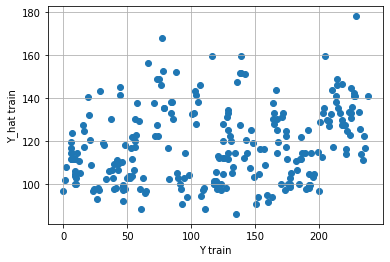

In [25]:
# plot the Y vs Y_hat for training and testing (two plots: one for train and one for test)

plt.figure()
plt.scatter(Y_tr,y_tr_hat)
plt.xlabel('Y train')
plt.ylabel('Y_hat train')
plt.grid(True)
plt.show()


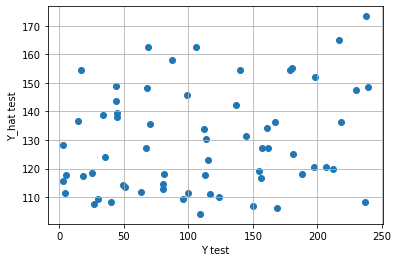

In [27]:
plt.figure()
plt.scatter(Y_te,y_te_hat)
plt.xlabel('Y test')
plt.ylabel('Y_hat test')
plt.grid(True)
plt.show()

The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

You can also use any other library to implement linear regression (Scikit-learn) for achieving the same task above. compare the solutions and the executing time for your custom linear regression solution and the scikit-learn built in linear regression model solution.

The following is the sample code on the random values generated. You can use this sample to build your 'Linear Regression' model using scikit-learn.

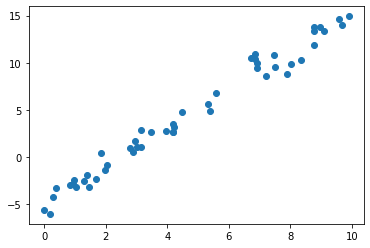

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

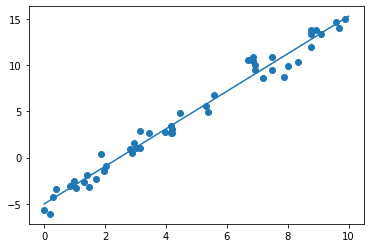

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204
